## Описание

Данный ноутбук является откликом на [вакансию яндекса](https://yandex.ru/jobs/vacancies/proj_man/data_techman/), Задание 1



### Условия задания 1
Формат файла: login tid Microtasks assigned_ts tclosed_ts.

Пояснение к формату: login — логин асессора; tid — id оцениваемого задания (task id); Microtasks – количество микрозаданий в одном задании; assigned_ts — время резервирования системой задания для асессора; closed_ts — точное время завершения работы над заданием; разделитель — табуляция \t.

Задание может состоять из одного или несколько микрозаданий. Время резервирования задания (assigned_ts) указывает на тот момент, когда система назначила определенного асессора исполнителем этого задания. Этот момент может совпадать с временем начала работы асессора над заданием, а может и не совпадать (асессор может отойти выпить чаю, а потом приступить к заданию, асессор может выполнять предыдущее задание, в то время как за ним зарезервированы новые).

Предположим, что асессор за 30 секунд своего рабочего времени получает N рублей.

Какую оплату вы считаете справедливой для выполнения асессором одного микрозадания из этого файла? Опишите подробно все этапы вашего решения.

## Итоги

### Выводы

1. При подсчете по рабочим периодам выполнение одной микрозадачи колеблется между 25-60 секундами. Причем большинство задач выполнено за 40 секунд.
2. Судя по всему ассесоры выполняют кучу разных дел в течении рабочего дня. Поэтому тяжело рассчитать таким образом продуктивность ассесора. Примерно половина ассесоров выполняет менее 100 задач в день. Причем есть те, которые за месяц почти ничего не делают. Так или иначе, если оставить только тех, кто работает максимально продуктивно - данные не сильно изменятся. (см. slowly_users в разделе очистки)
3. Распределение по среднедневной продуктивности среди ассесоров является по-каким-то причинам экспоненциальным, хотя должно было бы быть нормальным. По крайней-мере быть на него похожим и иметь отчетливый максимум. Как будто ассесоры стремяться выполнить минимум задач)) Либо сложность работы растет экспоненциально с числом выполненных задач. **Возможно, что ассесоры очень быстро устают?**
4. Количество задач, которые выполняются более 200 секунд, сравнимо с быстрыми задачами. Это может намекать на то, что в датасете имеются задачи разной стомости.

### Предлагаемое решение
1. Если требуется установить справедливую плату за задачу. Мы хотим оплачивать людям затрачиваемое ими время вне зависимости от уровня их способностей. 

   В качестве ориентира для оплаты я бы использовал величину 60 секунд за микрозадачу. За это время половина ассесоров спокойно могла бы выполнять микрозадачу. 

2. Требуется установить минимально возможную оплату за микрозадачу. Мы полагаем, что новички должны получать меньше тех, у кого получается лучше.

   В таком случае рекомендуется 30 секунд. С такой скоростью может работать только 25% ассесоров, что можно обьяснить их приспособленностью к задачам. 

### Комментарии

+ Если смотреть распределение по продуктивности среди ассесоров, то  по-каким-то причинам оно является экспоненциальным, хотя должно было бы  быть нормальным. По крайней-мере быть на него похожим и иметь отчетливый максимум. Как будто ассесоры стремяться выполнить минимум задач)) Либо  сложность работы растет экспоненциально с числом выполненных задач. **Возможно, что ассесоры очень быстро устают?**
+ Количество задач, которые выполняются более 200 секунд, сравнимо с  быстрыми задачами (менее минуты). Это может намекать на то, что в датасете имеются  задачи разной стомости.

   

### Предположения и допущения
1. Вообще говоря, я предполагал, что микрозадачи выполняются быстро и примерно за одно и тоже время. Т.е. нет задач, выполнение которых заняло бы целый рабочий день.
2. Похоже, что ассесоры часто занимаются чем-то еще, кроме решения микрозаданий, поэтому нельзя посчитать среднее число задач за рабочий день.

### Выдвигаемые гипотезы

1. Вообще говоря неправильно оплачивать только микрозадания - ведь их выбор и получение тоже требует времени. Т.е. можно для одного пользователя посчитать сколько он делает микрозаданий за рабочий день/ неделю/месяц/период и сделать усреднение. Т.е. посчитать периоды - когда взято задание и когда закончено. 
    1. Посчитать среднюю стомость микрозадания по минимальным периодам
    2. Посчитать количество заданий выполненных за день и поделить на 8 часов рабочего времени ассесора)
    
2. Использовать только пересекающиеся задания. Вычислить среднее/минимальное по ассесорам и исходя из этого оценивать.

### Очистка датасета
1. Дублирующие строки
    - у одной ячейки неправильно указано время открытия/закрытия
2. Придется выкинуть те задания которые начинают и заканчивают вырезанный период - скорее всего срез делался по времени открытия/закрытия. А это значит, что это задание могло выполняться одновременно с другими. (По датасету видно, что они часто пересекаются)
3. Придется выкинуть странные задания длиной более рабочего дня или оставленные незакрытыми на ночь. Конечно, это повлияет на значение, однако таких случаев немного - менее 1%, так что и влияние на конечный результат будет менее 1%. А из-за большой продолжительности их периода это сдвигает средние значения.


## Решение, код и комментарии

### Введение

В начале сделаем не большой обзор и пару тестов, нужна ли очистка датасета(нужна). Придется удалить дубликаты, есть ошибки (время начала больше времени окончания).

In [29]:
import pandas as pd
import seaborn as sns
import sourcefunc as sf

from IPython.display import display as show

df = pd.read_csv('sources/data_task4_old.txt', sep='\t')
df['start'] = pd.to_datetime(df.assigned_ts)
df['end'] = pd.to_datetime(df.closed_ts)
df['tid'] = df['tid'].astype(int)
df['tasks'] = df['Microtasks'].astype(int)

del df['assigned_ts'], df['closed_ts'], df['Microtasks']

for i in 'head describe info'.split():
    show(getattr(df,i)())


,login,tid,start,end,tasks
0,login0,190563850,2017-04-20 12:09:39,2017-04-20 13:13:01,4
1,login0,190561754,2017-04-20 12:10:30,2017-04-20 12:28:29,1
2,login0,190565906,2017-04-20 12:21:31,2017-04-20 13:30:10,4
3,login0,190560246,2017-04-20 12:28:30,2017-04-20 13:13:56,1
4,login0,190562168,2017-04-20 12:28:42,2017-04-20 13:14:50,2


,tid,tasks
count,7.018270e+05,701827.00000
mean,1.884911e+08,3.25439
std,1.391113e+07,3.65397
min,1.139586e+08,1.00000
25%,1.906846e+08,1.00000
50%,1.935373e+08,2.00000
75%,1.963667e+08,4.00000
max,1.985758e+08,50.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701827 entries, 0 to 701826
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   login   701827 non-null  object        
 1   tid     701827 non-null  int64         
 2   start   701827 non-null  datetime64[ns]
 3   end     701827 non-null  datetime64[ns]
 4   tasks   701827 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 26.8+ MB


None

In [30]:
df[df.duplicated(keep=False)].sort_values('tid').head()

,login,tid,start,end,tasks
596808,login652,113958665,2017-05-27 18:24:49,2017-05-27 18:29:58,5
600880,login652,113958665,2017-05-27 18:24:49,2017-05-27 18:29:58,5
600804,login652,113958669,2017-05-27 13:54:30,2017-05-27 13:58:58,5
596732,login652,113958669,2017-05-27 13:54:30,2017-05-27 13:58:58,5
596920,login652,113958679,2017-05-28 13:32:36,2017-05-28 13:33:51,5


In [31]:
(df['end'] < df['start']).sum()

1

In [32]:
df['duration'] = (df['end'] - df['start']).dt.total_seconds().astype(int)
df['duration'].describe().astype(int)

count     701827
mean        1929
std        12446
min         -729
25%           67
50%          157
75%          435
max      2043178
Name: duration, dtype: int64

Некоторые пользователи вообще не закрывают некоторые задачи, придется предварительно очистить датасет от них

# _________CLEAR_______________________

In [33]:
df = df.drop_duplicates()
df = df[df['end'] > df['start']]

In [34]:
# Можно выкинуть пользователей, 
# которые выполяли свою работу слишком медленно, 
# однако это почти ничего не меняет
slowly_users = set(
    open('sources/slowly_users.txt').read().split()
)
r = ~df['login'].isin(slowly_users)
df = df[r]

In [35]:
# ___addtional_clear___________________
# a) выкинуть все задачи, которые перенеслись с одного рабочего дня на другой

rulea = df['end'].dt.day == df['start'].dt.day
# sf.write('sources/cleared_a_df.pkl', df[rule])

In [36]:
# но что делать с ассесорами, которые работают по ночам?
# b) - можно выкинуть все задачи, которые длиннее 10 часов

ruleb = (df['end'] - df['start']) < pd.Timedelta('10h')

# >>> ruleb.sum()
# 12556

In [37]:
df = df[rulea & ruleb]

In [38]:
# _________CALCULATIONS________________


def calc(df_:pd.DataFrame) -> pd.DataFrame: 
    """
    Предварительно аггеригирует пересекающиеся периоды в один, затем
    вычисляет стоимость каждого периода, 
    по ф. количество выполненных задач / длина периода в сек.
    
    Возвращает DataFrame
    """
    xx = df_.groupby(["login"])[["start", "end", "tasks", 'tid']].apply(sf.task_cost)
    xx['dt'] = (xx['end'] - xx['start']).dt.total_seconds().astype(int)
    xx['cost'] = xx['dt']/xx['tasks']
    return xx

In [39]:
xx = calc(df)
xx.head()

start                 end  tasks  \
login                                                     
login0 0 2017-04-20 12:09:39 2017-04-20 13:30:10     14   
       1 2017-04-20 13:47:43 2017-04-20 14:22:22      2   
       2 2017-04-20 15:22:24 2017-04-20 17:23:42      9   
       3 2017-04-20 19:02:21 2017-04-20 19:35:41      8   
       4 2017-04-21 06:20:08 2017-04-21 08:19:49     77   

                                            completed_tasks    dt         cost  
login                                                                           
login0 0  ((190561754, 1), (190563850, 4), (190560246, 1...  4831   345.071429  
       1                   ((190565094, 1), (190560460, 1))  2079  1039.500000  
       2                   ((190662496, 5), (190660420, 4))  7278   808.666667  
       3  ((189300086, 4), (190564816, 1), (190565432, 1...  2000   250.000000  
       4  ((190550986, 2), (190554170, 2), (190552970, 1...  7181    93.259740

In [40]:
xx.describe()

,tasks,dt,cost
count,41222.000000,41222.000000,41222.000000
mean,49.189874,3809.302994,213.073010
std,86.772290,6193.783144,710.020054
min,1.000000,8.000000,1.934023
25%,8.000000,740.250000,34.830975
50%,21.000000,1922.500000,68.111111
75%,55.000000,4059.000000,153.666667
max,3577.000000,86309.000000,31436.000000


# Гипотеза 1.
Посмотрим, как задачи распределены по времени. Сначала посмотрим среднюю стоимость задачи в секундах по периодам.

### По рабочим периодам

In [41]:
x = xx.copy()
x['cost'] = xx['cost'].map(lambda xf: round(xf, 0))
x = x.groupby('cost')['tasks'].sum()
x = x.to_frame().reset_index()

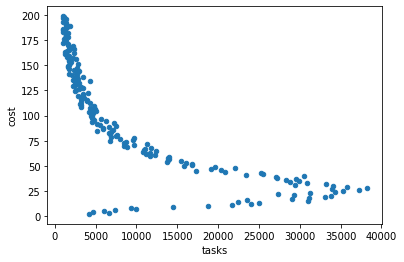

In [42]:
r = x['cost'] < 200
# r &= x['tasks'] > 10000

x[r].plot('tasks', 'cost','scatter');


In [43]:
x.sort_values('tasks').tail()

,cost,tasks
22,24.0,34352
23,25.0,35271
27,29.0,35830
24,26.0,37293
26,28.0,38224


,tasks,dt,cost
count,26067.000000,26067.000000,26067.000000
mean,63.508612,2517.359151,45.798258
std,102.017922,3852.640235,24.032346
min,1.000000,8.000000,1.934023
25%,12.000000,468.000000,26.400000
50%,32.000000,1413.000000,41.522727
75%,75.000000,3018.500000,63.328431
max,3577.000000,84111.000000,99.974359


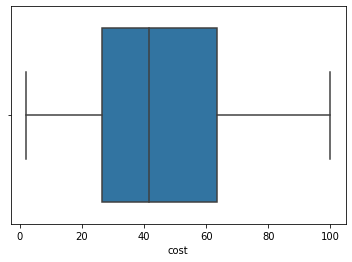

In [44]:
# выкинем все задачи, где стоимость миркозадания более часа
r = xx['cost'] < 100

sns.boxplot(x=xx[r]['cost']);
xx[r].describe()

В принципе здесь мы получаем первый результат. Выполнение одной микрозадачи колеблется между 25-60 секундами. Причем большинство задач выполнено за 40 секунд. 

### Комментарии

<AxesSubplot:xlabel='tasks', ylabel='cost'>

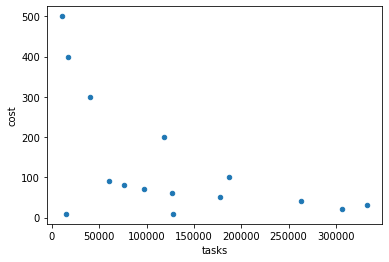

In [45]:
x = xx.copy()
x['cost'] = x['cost'].map(lambda xf: round(
    xf,
    1 - len(
            str(
                round(xf)
            )
    )
            ))
x = x.groupby('cost')['tasks'].sum()
x = x.to_frame().reset_index()
xd = x.describe([0.1 * i for i in range(10)])
r = ~x['cost'].isna()
# r &= x['cost']<1000
# r &= x['cost']<500
r &= x['tasks']>10000
# r &= x['tasks']<150000
x = x[r]
x.plot('tasks', 'cost','scatter')

Видно, что количество задач, которые выполняются более 200 секунд, сравнимо с быстрыми задачами. Это может намекать на то, что в датасете имеются задачи разной стомости.

### По рабочим дням
Судя по всему ассесоры выполняют кучу разных дел в течении рабочего дня. Поэтому тяжело рассчитать таким образом продуктивность ассесора. Примерно половина ассесоров выполняет менее 100 задач в день. Причем есть те, которые за месяц почти ничего не делают. Так или иначе, если оставить только тех, кто работает максимально продуктивно - данные не сильно изменятся. (см. slowly_users в разделе очистки)

In [46]:
yy = xx.copy()
yy['day'] = yy['end'].dt.strftime('%Y-%m-%d')

task_by_day = yy.groupby(['login', 'day'])['tasks'].sum()


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tasks'>

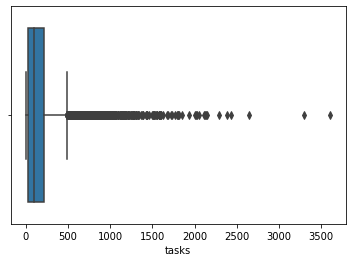

In [47]:
sns.boxplot(task_by_day.droplevel(-1))

Похоже, что ассесоры часто занимаются чем-то еще, кроме решения микрозаданий.

In [48]:
task_by_day.sort_values()

login     day       
login354  2017-05-18       1
login578  2017-05-21       1
login8    2017-05-24       1
login275  2017-04-21       1
login718  2017-05-04       1
                        ... 
login139  2017-04-26    2386
          2017-04-29    2428
login685  2017-04-26    2652
login139  2017-04-25    3301
          2017-04-27    3610
Name: tasks, Length: 11790, dtype: int64

In [49]:
task_by_day.describe()

count    11790.000000
mean       171.985157
std        232.288228
min          1.000000
25%         31.000000
50%         91.000000
75%        215.000000
max       3610.000000
Name: tasks, dtype: float64

In [50]:
pd.cut(task_by_day, [0,5,10,20,35,50,100,250,500,1000, 5000]).value_counts().sort_index()

(0, 5]           711
(5, 10]          564
(10, 20]         919
(20, 35]        1054
(35, 50]         853
(50, 100]       2162
(100, 250]      3039
(250, 500]      1565
(500, 1000]      784
(1000, 5000]     139
Name: tasks, dtype: int64

In [51]:
# Количество задач выполненное ассесором за месяц
whole_tasks = yy.groupby(['login'])['tasks'].sum()
whole_tasks.describe()

count      531.000000
mean      3818.653484
std       4971.500701
min        301.000000
25%       1113.000000
50%       2246.000000
75%       4305.500000
max      51272.000000
Name: tasks, dtype: float64

In [52]:
# Ассесоры, которые продуктивные
logins = whole_tasks[whole_tasks>400].index

In [53]:
# средняя продуктивность ассесоров в день
task_by_day.groupby('login').mean().describe()

count     531.000000
mean      159.648539
std       142.330213
min        35.100000
25%        71.485714
50%       109.400000
75%       203.718750
max      1424.222222
Name: tasks, dtype: float64

In [54]:
su = task_by_day.groupby('login').mean()
slowly_users.update(su[su<35].index, whole_tasks[whole_tasks<300].index)
print(len(slowly_users))
# sf.write('sources/slowly_users.pkl', slowly_users)
# open('sources/slowly_users.txt', 'w').write('\n'.join(slowly_users))

236


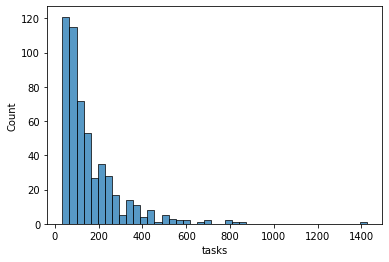

In [55]:
sns.histplot(su);

Если смотреть распределение по продуктивности среди ассесоров, то по-каким-то причинам оно является экспоненциальным, хотя должно было бы быть нормальным. По крайней-мере быть на него похожим и иметь отчетливый максимум. Как будто ассесоры стремяться выполнить минимум задач)) Либо сложность работы растет экспоненциально с числом выполненных задач. **Возможно, что ассесоры очень быстро устают?**